In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.drop(["rating","votes","released"],axis=1,inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(7668, 12)

In [8]:
df.isnull().sum()

name           0
genre          0
year           0
score          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
df.dropna(subset=["gross"], inplace=True)

In [10]:
budget_median=df["budget"].median()
df["budget"]=df["budget"].fillna(budget_median)

In [11]:
df['company']=df['company'].fillna(df['company'].mode()[0])
df['writer']=df['writer'].fillna(df['writer'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])
df['runtime']=df['runtime'].fillna(df['runtime'].mode()[0])

In [12]:
df.isnull().sum()

name        0
genre       0
year        0
score       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [13]:
df.shape

(7479, 12)

In [14]:
df.dtypes

name         object
genre        object
year          int64
score       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
df

,name,genre,year,score,director,writer,star,country,budget,gross,company,runtime
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,Crime,2020,5.4,Scott Teems,Scott Teems,Shea Whigham,United States,21000000.0,3661.0,Prowess Pictures,98.0
7655,Legend of Deification,Animation,2020,6.6,Teng Cheng,Woody Allen,Guangtao Jiang,China,21000000.0,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,Comedy,2020,5.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,21000000.0,413378.0,Pryor Entertainment,120.0
7657,Leap,Drama,2020,6.7,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,21000000.0,25818882.0,Universal Pictures,135.0


In [16]:
df["budget"]=df["budget"].astype("int64")
df["gross"]=df["gross"].astype("int64")
df["runtime"]=df["runtime"].astype("int64")

In [17]:
df.sample(10)

,name,genre,year,score,director,writer,star,country,budget,gross,company,runtime
7142,Downsizing,Drama,2017,5.7,Alexander Payne,Alexander Payne,Matt Damon,United States,68000000,55003890,Paramount Pictures,135
6713,Hitman: Agent 47,Action,2015,5.7,Aleksander Bach,Skip Woods,Rupert Friend,United States,35000000,82347656,Twentieth Century Fox,96
2163,Love Potion No. 9,Comedy,1992,5.7,Dale Launer,Dale Launer,Tate Donovan,United States,21000000,754935,Penta Pictures,92
7157,Battle of the Sexes,Biography,2017,6.7,Jonathan Dayton,Simon Beaufoy,Emma Stone,United Kingdom,25000000,18598607,Cloud Eight Films,121
5635,Broken Embraces,Drama,2009,7.2,Pedro Almodóvar,Pedro Almodóvar,Penélope Cruz,Spain,18000000,37472736,Universal Pictures International (UPI),127
3104,Vegas Vacation,Comedy,1997,6.0,Stephen Kessler,Elisa Bell,Chevy Chase,United States,25000000,36400360,Warner Bros.,93
5174,Pathfinder,Action,2007,5.4,Marcus Nispel,Laeta Kalogridis,Karl Urban,United States,45000000,30984583,Twentieth Century Fox,99
1947,Hear My Song,Comedy,1991,7.0,Peter Chelsom,Peter Chelsom,Ned Beatty,Ireland,21000000,4313473,British Screen Productions,104
2365,Les visiteurs,Comedy,1993,7.1,Jean-Marie Poiré,Christian Clavier,Christian Clavier,France,21000000,659810,Alpilles Productions,107
5513,Mother,Crime,2009,7.8,Bong Joon Ho,Bong Joon Ho,Hye-ja Kim,South Korea,5000000,17203507,CJ Entertainment,129


In [18]:
df.sort_values(by="gross",ascending=False)

,name,genre,year,score,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,Action,2009,7.8,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,Action,2019,8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,Drama,1997,7.8,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,Action,2015,7.8,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,Action,2018,8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",Comedy,2000,6.5,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,21000000,1400,British Broadcasting Corporation (BBC),103
7625,The Untold Story,Comedy,2019,5.7,Shane Stanley,Lee Stanley,Miko Hughes,United States,21000000,790,Visual Arts Entertainment,104
7580,Run with the Hunted,Crime,2019,5.2,John Swab,John Swab,Ron Perlman,United States,21000000,682,Roxwell Films,93
2417,Madadayo,Drama,1993,7.3,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134


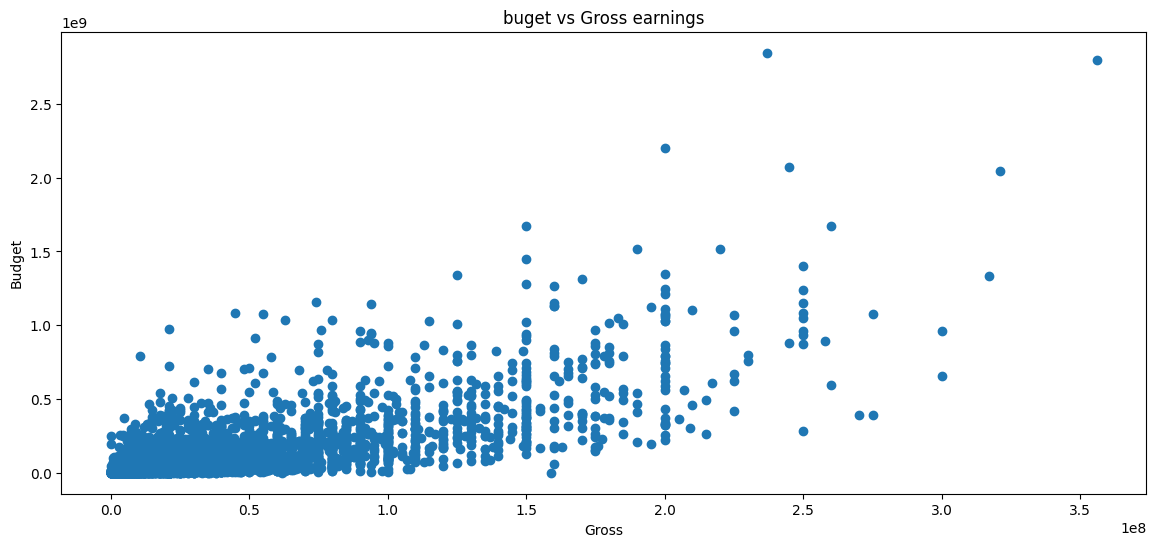

In [19]:
plt.figure(figsize=(14,6))
plt.scatter(x=df["budget"],y=df["gross"])
plt.title("buget vs Gross earnings")
plt.xlabel("Gross")
plt.ylabel("Budget")
plt.show()

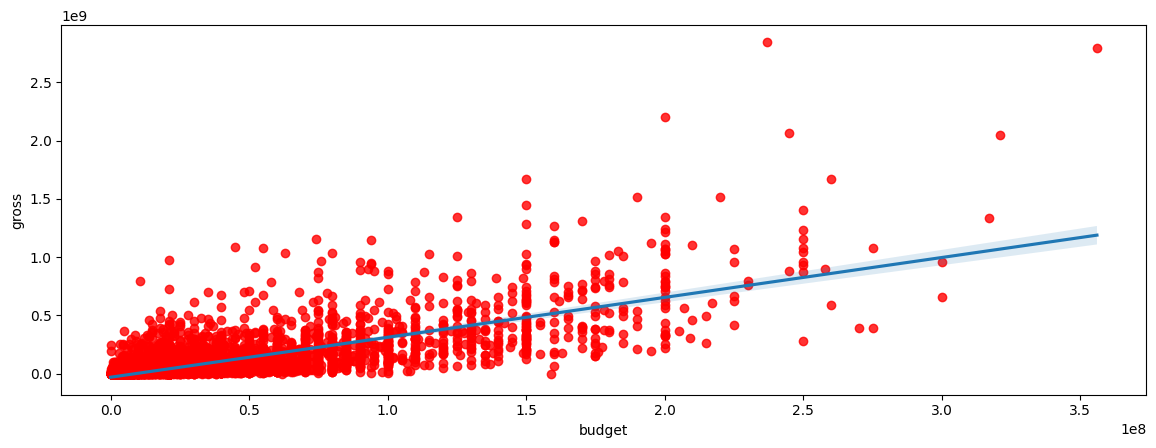

In [20]:
ax=sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"})
ax.figure.set_figwidth(14)

In [21]:
df

,name,genre,year,score,director,writer,star,country,budget,gross,company,runtime
0,The Shining,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,Crime,2020,5.4,Scott Teems,Scott Teems,Shea Whigham,United States,21000000,3661,Prowess Pictures,98
7655,Legend of Deification,Animation,2020,6.6,Teng Cheng,Woody Allen,Guangtao Jiang,China,21000000,240663149,Beijing Enlight Pictures,110
7656,Tulsa,Comedy,2020,5.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,21000000,413378,Pryor Entertainment,120
7657,Leap,Drama,2020,6.7,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,21000000,25818882,Universal Pictures,135


In [22]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,year,score,budget,gross,runtime
year,1.000000,0.091821,0.288977,0.257486,0.114618
score,0.091821,1.000000,0.058253,0.186258,0.397364
budget,0.288977,0.058253,1.000000,0.744926,0.272867
gross,0.257486,0.186258,0.744926,1.000000,0.245228
runtime,0.114618,0.397364,0.272867,0.245228,1.000000


<Axes: >

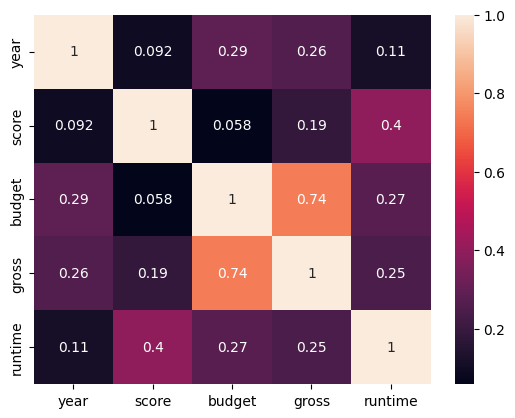

In [23]:
sns.heatmap(corr_matrix,annot=True)

In [24]:
df_new=df.copy()
for col in df_new.columns:
    if df_new[col].dtype=="object":
        df_new[col]=df_new[col].astype('category')
        df_new[col]=df_new[col].cat.codes

df_new
        

,name,genre,year,score,director,writer,star,country,budget,gross,company,runtime
0,6428,6,1980,8.4,2500,3890,994,52,19000000,46998772,2213,146
1,5426,1,1980,5.8,2189,1578,313,53,4500000,58853106,701,104
2,5006,0,1980,8.7,1072,2485,1666,53,18000000,538375067,1470,124
3,280,4,1980,7.7,1260,1936,2146,53,3500000,83453539,1728,88
4,1001,4,1980,7.3,1019,507,394,53,6000000,39846344,1695,98
...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6321,5,2020,5.4,2430,3760,2336,53,21000000,3661,1817,98
7655,3105,2,2020,6.6,2620,4358,885,8,21000000,240663149,360,110
7656,6851,4,2020,5.0,2425,3753,2276,53,21000000,413378,1819,120
7657,3088,6,2020,6.7,2112,1932,870,8,21000000,25818882,2175,135


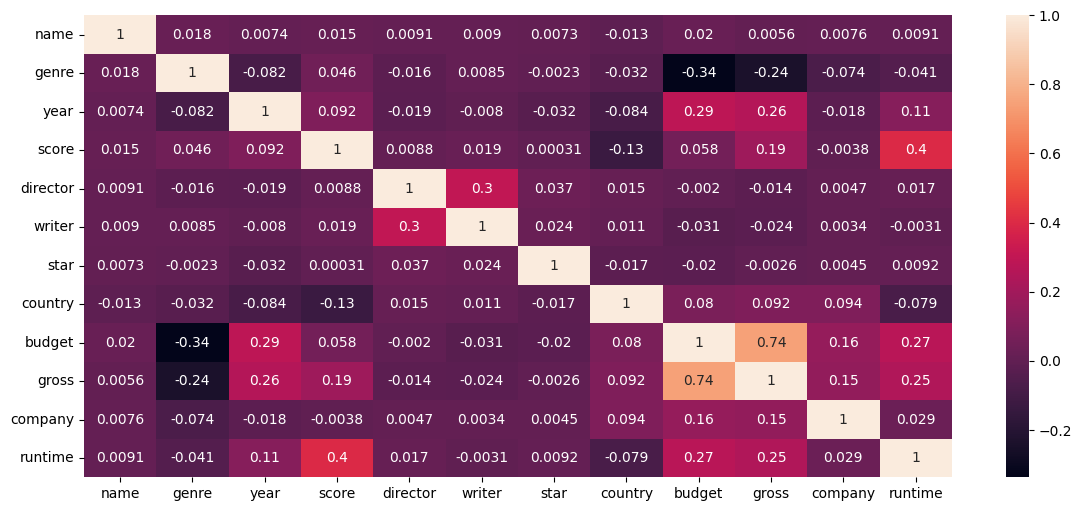

In [31]:
corr_mat=df_new.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
c=corr_mat.unstack().sort_values()
c[c>0.5]

budget    gross       0.744926
gross     budget      0.744926
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

budget and gross are highly correlated